<a href="https://colab.research.google.com/github/maheshk221/Machine-learnig/blob/main/Copy_of_dataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# data loading

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


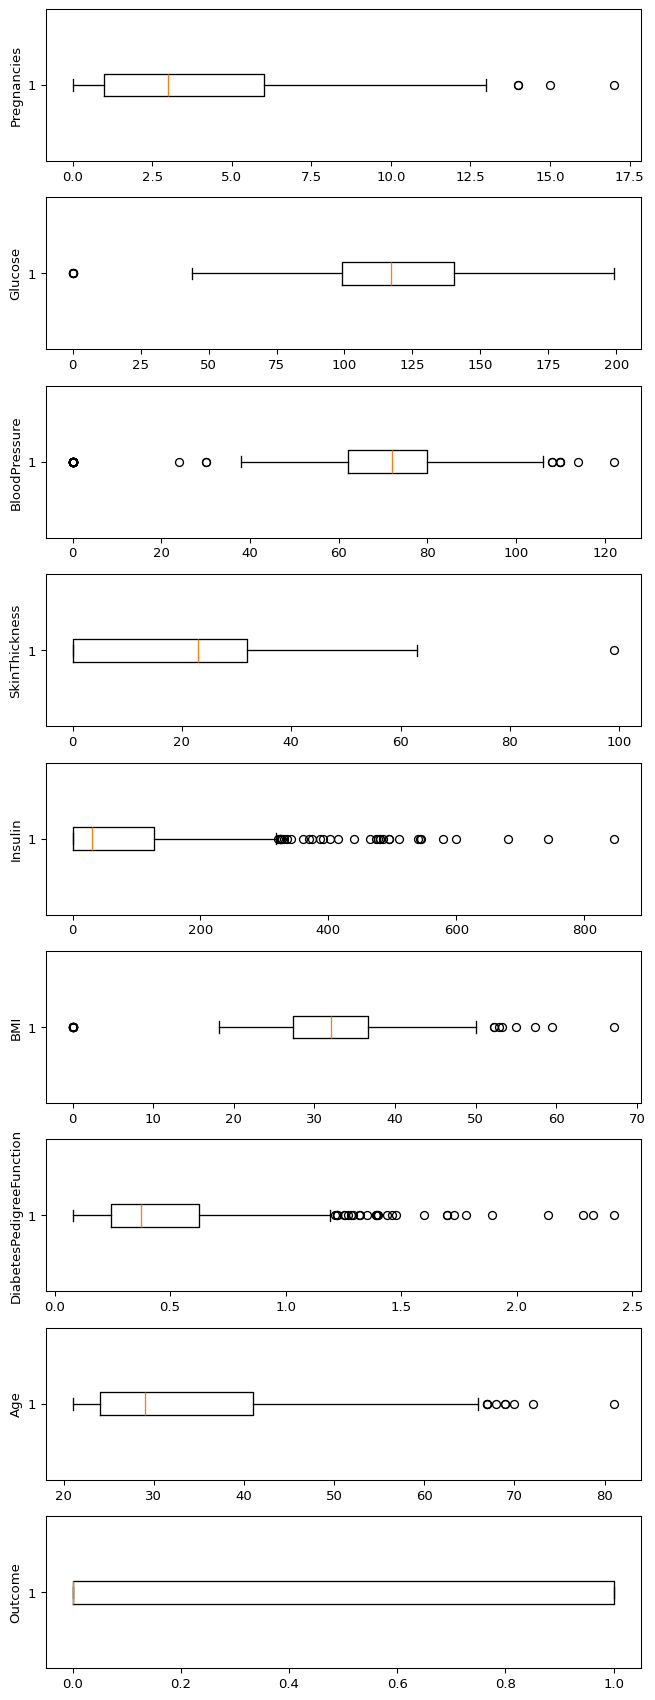

In [ ]:
fig, axs =plt.subplots(len(df.columns),1, figsize=(7,18),dpi=95)

for i, col in enumerate(df.columns):
  axs[i].boxplot(df[col], vert=False)
  axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
q1, q3 =np.percentile(df['Insulin'], [25, 75])
iqr=q3-q1

lower=q1-1.5*iqr
upper=q3+1.5*iqr

clean_df=df[(df['Insulin']>= lower) & (df['Insulin'])<=upper]


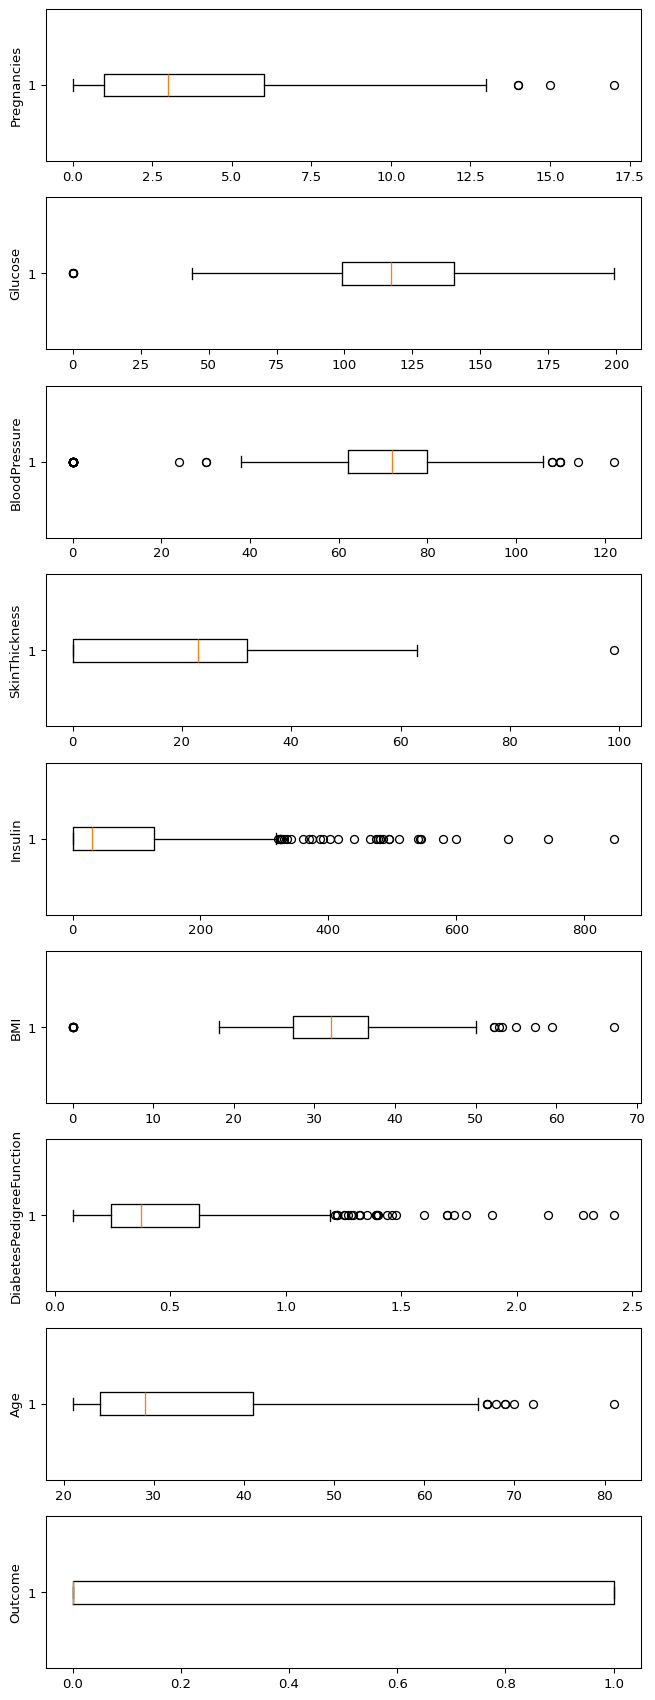

In [ ]:
fig, axs =plt.subplots(len(clean_df.columns),1, figsize=(7,18),dpi=95)

for i, col in enumerate(clean_df.columns):
  axs[i].boxplot(clean_df[col], vert=False)
  axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


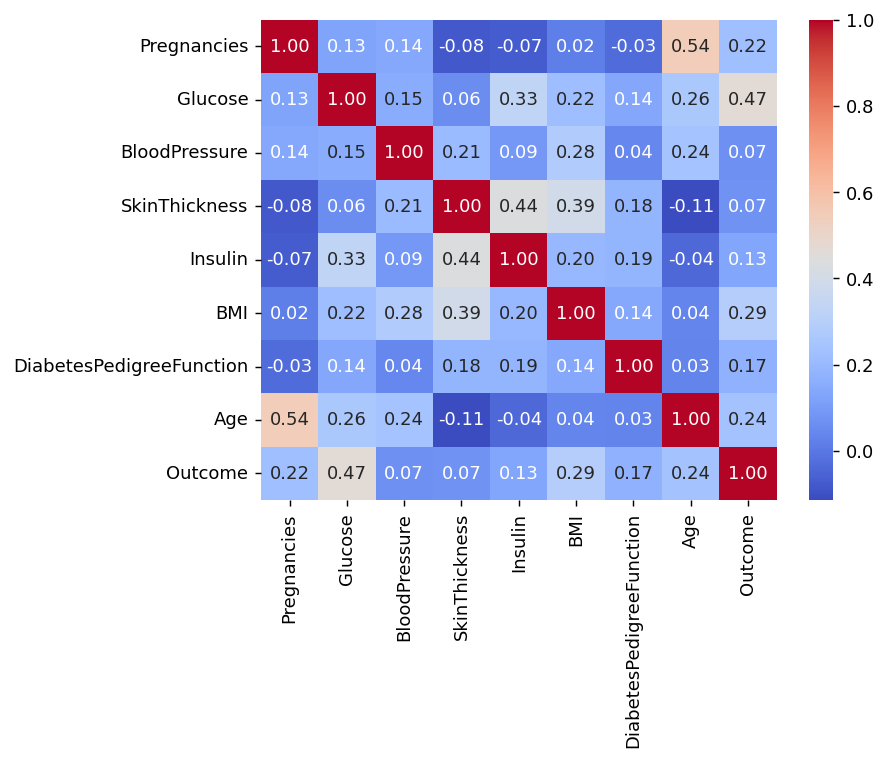

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [ ]:
corr=df.corr()
plt.figure(dpi=130)

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()
print(corr['Outcome'].sort_values(ascending=False))

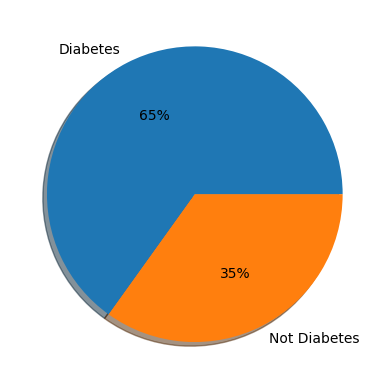

In [ ]:
plt.pie(df['Outcome'].value_counts(), labels=[
    'Diabetes','Not Diabetes'],autopct='%.f%%',shadow=True
        )
plt.show()

In [ ]:
X=df.drop(columns=['Outcome'] )
y=df['Outcome']

In [ ]:
scaler=MinMaxScaler()
X_normalised=scaler.fit_transform(X)
print(X_normalised[:5])

[[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


In [ ]:
scaler=StandardScaler()
X_standardized=scaler.fit_transform(X)
print(X_standardized)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


# Data Cleaning


In [ ]:
df=pd.read_csv('Titanic-Dataset.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [ ]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
cat_col=[col for col in df.columns if df[col].dtype=='object']
num_col=[col for col in df.columns if df[col].dtype!='object']
print('Categorical columns:', cat_col)
print('numerical columns:', num_col)


Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
df[cat_col].nunique()

,0
Name,891
Sex,2
Ticket,681
Cabin,147
Embarked,3


In [ ]:
round((df.isnull().sum() /df.shape[0])*100,2)

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [ ]:
df1=df.drop(columns=['Name','Ticket','Cabin'])
df1.dropna(subset=['Embarked'], inplace=True)
df1['Age'].fillna(df1['Age'].mean(),inplace=True)

/tmp/ipython-input-3063148946.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].mean(),inplace=True)


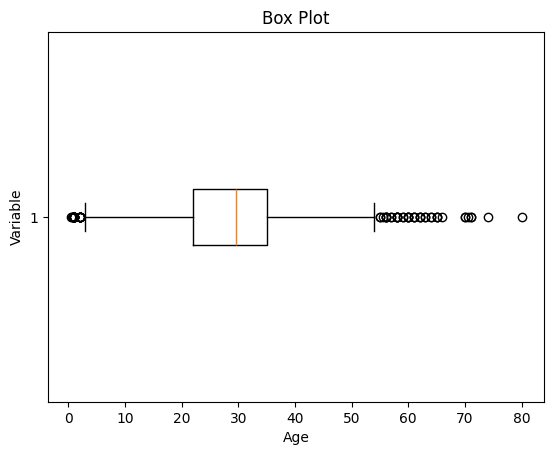

In [ ]:
plt.boxplot(df1['Age'],vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [ ]:
mean=df1['Age'].mean()
std=df1['Age'].std()

lower=mean-2*std
upper=mean+ 2* std

df2=df1[(df1['Age']>= lower) &(df1['Age']<=upper) ]

print('lower:', lower)
print('upper:', upper)

lower: 3.705400107925648
upper: 55.578785285332785


In [ ]:
df3=df2.fillna(df2['Age'].mean())
df3.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
mean=df3['Age'].mean()
std=df3['Age'].std()
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)

df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]

Lower Bound : 8.978989004171481
Upper Bound : 49.30395961288911


In [ ]:
x=df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
y=df3['Survived']

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))

num_col=[col for col in x.columns if x[col].dtype!='object']
x1=x
x1[num_col]=scaler.fit_transform(x1[num_col])
x1.head()

/tmp/ipython-input-1151302479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col]=scaler.fit_transform(x1[num_col])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.349515,0.125,0.0,0.014151,S
1,0.0,female,0.660194,0.125,0.0,0.139136,C
2,1.0,female,0.427184,0.000,0.0,0.015469,S
3,0.0,female,0.601942,0.125,0.0,0.103644,S
4,1.0,male,0.601942,0.000,0.0,0.015713,S


# Handling missing values

In [ ]:


data = {
'School ID': [101, 102, 103, np.nan, 105, 106, 107, 108],
'Name': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
'Address': ['123 Main St', '456 Oak Ave', '789 Pine Ln', '101 Elm St', np.nan, '222 Maple Rd', '444 Cedar Blvd', '555 Birch Dr'],
'City': ['Mumbai', 'Delhi', 'Bengaluru', 'Chennai', 'Kolkata', np.nan, 'Pune', 'Jaipur'],
'Subject': ['Math', 'English', 'Science', 'Math', 'History', 'Math', 'Science', 'English'],
'Marks': [85, 92, 78, 89, np.nan, 95, 80, 88],
'Rank': [2, 1, 4, 3, 8, 1, 5, 3],
'Grade': ['B', 'A', 'C', 'B', 'D', 'A', 'C', 'B']
}

df = pd.DataFrame(data)
print("Sample DataFrame:")
print(df)

Sample DataFrame:
   School ID Name         Address       City  Subject  Marks  Rank Grade
0      101.0    A     123 Main St     Mumbai     Math   85.0     2     B
1      102.0    B     456 Oak Ave      Delhi  English   92.0     1     A
2      103.0    C     789 Pine Ln  Bengaluru  Science   78.0     4     C
3        NaN    D      101 Elm St    Chennai     Math   89.0     3     B
4      105.0    E             NaN    Kolkata  History    NaN     8     D
5      106.0    F    222 Maple Rd        NaN     Math   95.0     1     A
6      107.0    G  444 Cedar Blvd       Pune  Science   80.0     5     C
7      108.0    H    555 Birch Dr     Jaipur  English   88.0     3     B


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   School ID  7 non-null      float64
 1   Name       8 non-null      object 
 2   Address    7 non-null      object 
 3   City       7 non-null      object 
 4   Subject    8 non-null      object 
 5   Marks      7 non-null      float64
 6   Rank       8 non-null      int64  
 7   Grade      8 non-null      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 644.0+ bytes


In [ ]:
'''
school id -> remove
address -> dropna
marks -> meand
'''

In [ ]:
df.isnull().sum()

,0
School ID,1
Name,0
Address,1
City,1
Subject,0
Marks,1
Rank,0
Grade,0


In [ ]:
df.notnull().sum()

In [ ]:
df1=df.dropna(subset=['School ID'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 7
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   School ID  7 non-null      float64
 1   Name       7 non-null      object 
 2   Address    6 non-null      object 
 3   City       6 non-null      object 
 4   Subject    7 non-null      object 
 5   Marks      6 non-null      float64
 6   Rank       7 non-null      int64  
 7   Grade      7 non-null      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 504.0+ bytes


In [ ]:
df_cleaned=df.dropna()
df_cleaned.isnull().sum()

,0
School ID,0
Name,0
Address,0
City,0
Subject,0
Marks,0
Rank,0
Grade,0


In [ ]:
mean_imputation=df['Marks'].fillna(df['Marks'].mean())
median_imputation=df['Marks'].fillna(df['Marks'].median())
mode_imputation=df['Marks'].fillna(df['Marks'].mode().iloc[0])

print('mean',df['Marks'].mean())
print('median : ',df['Marks'].median())
print('mode:',df['Marks'].mode())

print(mean_imputation)
print(median_imputation)
print(mode_imputation)

mean 86.71428571428571
median :  88.0
mode: 0    78.0
1    80.0
2    85.0
3    88.0
4    89.0
5    92.0
6    95.0
Name: Marks, dtype: float64
0    85.000000
1    92.000000
2    78.000000
3    89.000000
4    86.714286
5    95.000000
6    80.000000
7    88.000000
Name: Marks, dtype: float64
0    85.0
1    92.0
2    78.0
3    89.0
4    88.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64
0    85.0
1    92.0
2    78.0
3    89.0
4    78.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64


In [ ]:
forward_fill=df['Marks'].fillna(method='ffill')
backward_fill=df['Marks'].fillna(method='bfill')

print("\nForward Fill:")
print(forward_fill)

print("\nBackward Fill:")
print(backward_fill)


Forward Fill:
0    85.0
1    92.0
2    78.0
3    89.0
4    89.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64

Backward Fill:
0    85.0
1    92.0
2    78.0
3    89.0
4    95.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64


/tmp/ipython-input-3025412989.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_fill=df['Marks'].fillna(method='ffill')
/tmp/ipython-input-3025412989.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  backward_fill=df['Marks'].fillna(method='bfill')


In [ ]:
linear_interpolation=df['Marks'].interpolate(method='linear')
quadratic_interpolation=df['Marks'].interpolate(method='quadratic')

print("\nLinear Interpolation:")
print(linear_interpolation)

print("\nQuadratic Interpolation:")
print(quadratic_interpolation)



Linear Interpolation:
0    85.0
1    92.0
2    78.0
3    89.0
4    92.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64

Quadratic Interpolation:
0    85.00000
1    92.00000
2    78.00000
3    89.00000
4    98.28024
5    95.00000
6    80.00000
7    88.00000
Name: Marks, dtype: float64


In [ ]:
df

,School ID,Name,Address,City,Subject,Marks,Rank,Grade
0,101.0,A,123 Main St,Mumbai,Math,85.0,2,B
1,102.0,B,456 Oak Ave,Delhi,English,92.0,1,A
2,103.0,C,789 Pine Ln,Bengaluru,Science,78.0,4,C
3,NaN,D,101 Elm St,Chennai,Math,89.0,3,B
4,105.0,E,NaN,Kolkata,History,NaN,8,D
5,106.0,F,222 Maple Rd,NaN,Math,95.0,1,A
6,107.0,G,444 Cedar Blvd,Pune,Science,80.0,5,C
7,108.0,H,555 Birch Dr,Jaipur,English,88.0,3,B


# Handling outliers
